In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
raw_data = "..\\data\\synthetic_fraud_dataset.csv"
df = pd.read_csv(raw_data)
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [34]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction_ID,50000,50000,TXN_5311,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User_ID,50000,8963,USER_6599,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction_Amount,50000.0,NaN,NaN,NaN,99.411012,98.687292,0.0,28.6775,69.66,138.8525,1174.14
Transaction_Type,50000,4,POS,12549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp,50000,47724,2023-06-04 06:35:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account_Balance,50000.0,NaN,NaN,NaN,50294.065981,28760.458557,500.48,25355.995,50384.43,75115.135,99998.31
Device_Type,50000,3,Tablet,16779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,50000,5,Tokyo,10208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchant_Category,50000,5,Clothing,10033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IP_Address_Flag,50000.0,NaN,NaN,NaN,0.0502,0.21836,0.0,0.0,0.0,0.0,1.0


In [35]:
df.isnull().sum().sort_values(ascending=False)

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

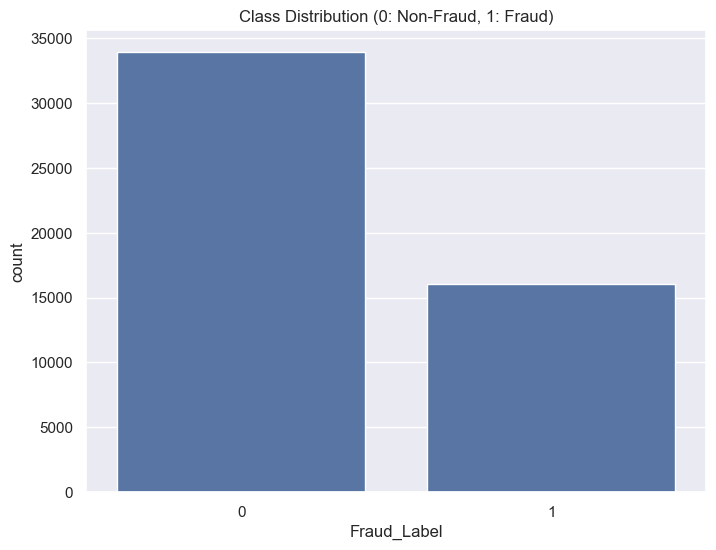

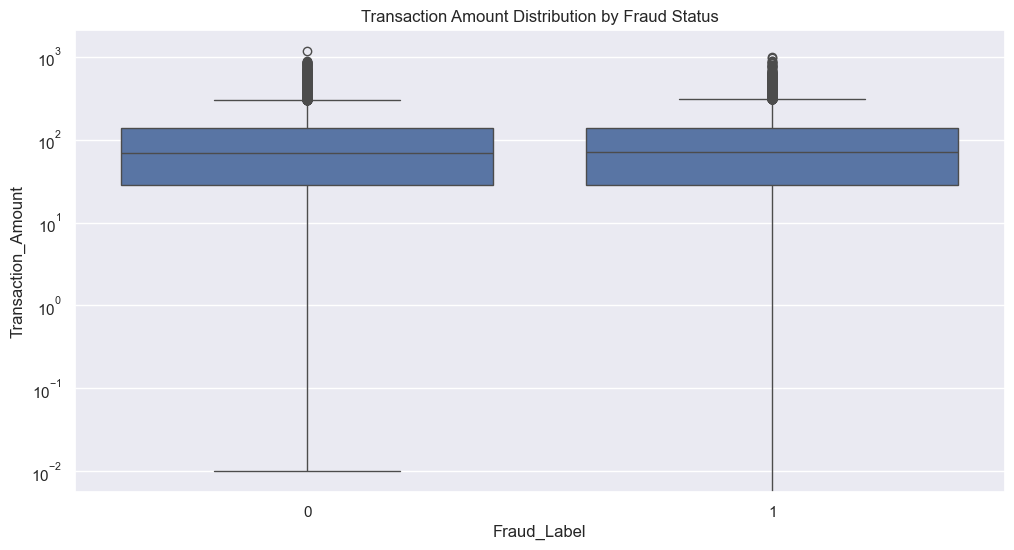

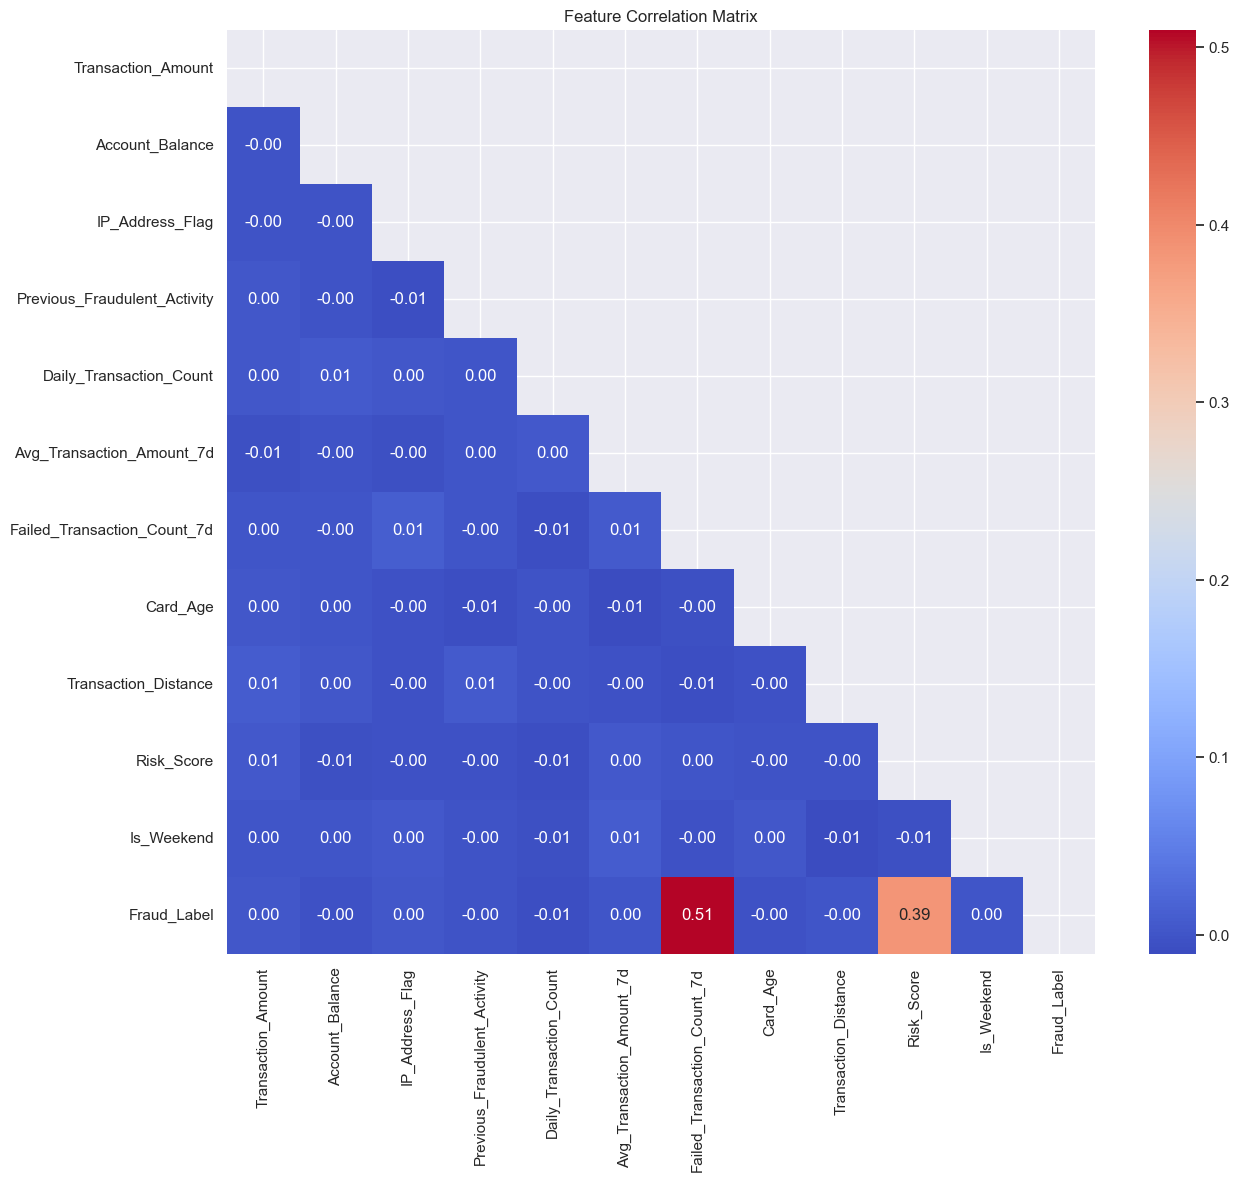

In [36]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud_Label', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

# Plot transaction amount by fraud status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud_Label', y='Transaction_Amount', data=df)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.yscale('log')  # Log scale for better visualization
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 12))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Feature Correlation Matrix')
plt.show()